# 数据探索性分析与数据预处理(自选2个数据集)

## 分析报告一
### 1.数据集选择
wine reviews: winemag-data_first150k.csv  
wine reviews: winemag-data-130k-v2.csv (用于对比数据缺失处理的原始数据集使用)


### 2.数据分析要求
### 2.1 数据可视化和摘要
#### 2.1.1 数据摘要  
**标称属性，给出每个可能取值的频数**  
该数据集中标称属性有：country、disignation、province、region_1、region_2、variety、winery  
由于属性值较多，以country为例展示（其他属性分析见.py代码）  

**Name: country, dtype: int64**

In [2]:
#导入第三方库
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
#读取数据
wine = pd.DataFrame(pd.read_csv('winemag-data_first150k.csv'))
#展示country属性的所有取值
print(wine['country'].value_counts())

US                        62397
Italy                     23478
France                    21098
Spain                      8268
Chile                      5816
Argentina                  5631
Portugal                   5322
Australia                  4957
New Zealand                3320
Austria                    3057
Germany                    2452
South Africa               2258
Greece                      884
Israel                      630
Hungary                     231
Canada                      196
Romania                     139
Slovenia                     94
Uruguay                      92
Croatia                      89
Bulgaria                     77
Moldova                      71
Mexico                       63
Turkey                       52
Georgia                      43
Lebanon                      37
Cyprus                       31
Brazil                       25
Macedonia                    16
Serbia                       14
Morocco                      12
Luxembou

| country      |               频数|     | country      |               频数|
| :-----: | :-----: |                   | :-----: | :-----: |
| US           |             62397|     | Lebanon      |                37|
| Italy        |             23478|     | Cyprus       |                31|
| France       |             21098|     | Brazil       |                25|
| Spain        |              8268|     | Macedonia    |                16|
| Chile        |              5816|     | Serbia       |                14|
| Argentina    |              5631|     | Morocco      |                12|
| Portugal     |              5322|     | England      |                 9|
| Australia    |              4957|     | Luxembourg   |                 9|
| New Zealand  |              3320|     | Lithuania    |                 8|
| Austria      |              3057|     | India        |                 8|
| Germany      |              2452|     | Czech Republic|                6|
| South Africa |              2258|     | Ukraine      |                 5|
| Greece       |               884|     | Switzerland  |                 4|
| Israel       |               630|     | Bosnia and Herzegovina|        4|
| Hungary      |               231|     | South Korea  |                 4|
| Canada       |               196|     | Egypt       |                  3|
| Romania      |               139|     | China       |                  3|
| Slovenia     |                94|     | Slovakia    |                  3|
| Uruguay      |                92|     | Albania     |                  2|
| Croatia      |                89|     | Montenegro  |                  2|
| Bulgaria     |                77|     | Tunisia     |                  2|
| Moldova      |                71|     | Japan       |                  2|
| Mexico       |                63|     | US-France   |                  1|
| Turkey       |                52|
| Georgia      |                43|

**country属性直方图**

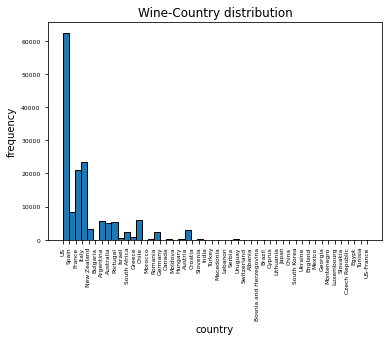

In [3]:
#country属性直方图
plt.hist(x=wine['country'].dropna(), bins=50, edgecolor='black')
# 添加x轴和y轴标签
plt.xlabel('country')
plt.ylabel('frequency')
# 添加标题
plt.title('Wine-Country distribution')
plt.xticks(rotation=90)
plt.tick_params(labelsize=6)
plt.savefig('./wineResult/country_distribution_hist.png')
plt.show()

**数值属性，给出数值属性的五数概括及缺失值的个数**  
该数据集中数值属性有：price、points  
**Name: price, dtype: float64**  

In [4]:
wine = pd.DataFrame(pd.read_csv('winemag-data_first150k.csv'))
print(wine['price'].describe())

count    137235.000000
mean         33.131482
std          36.322536
min           4.000000
25%          16.000000
50%          24.000000
75%          40.000000
max        2300.000000
Name: price, dtype: float64


| price      |               |
| :-----: | :-----: |                  
| count      |    137235.0000|     
| mean       |        33.1315|
| std        |        36.3225|
| min        |         4.0000|
| 25%        |        16.0000|
| 50%        |        24.0000|
| 75%        |        40.0000|
| max        |      2300.0000|

**Name: points, dtype: float64**

In [5]:
wine = pd.DataFrame(pd.read_csv('winemag-data_first150k.csv'))
print(wine['points'].describe())

count    150930.000000
mean         87.888418
std           3.222392
min          80.000000
25%          86.000000
50%          88.000000
75%          90.000000
max         100.000000
Name: points, dtype: float64


| points      |               |
| :-----: | :-----: |                  
| count      |    150930.0000|     
| mean       |        87.8884|
| std        |         3.2224|
| min        |        80.0000|
| 25%        |        86.0000|
| 50%        |        88.0000|
| 75%        |        90.0000|
| max        |       100.0000|

该数据集的缺省值情况为 

In [6]:
print(wine.isna().sum())

Unnamed: 0         0
country            5
description        0
designation    45735
points             0
price          13695
province           5
region_1       25060
region_2       89977
variety            0
winery             0
dtype: int64


| 缺失值      |               |
| :-----: | :-----: |                  
| country    |    5|     
| description|    0|
| designation|45735|
| points     |    0|
| price      |13695|
| province   |    5|
| region_1   |25060|
| region_2   |89977|
| variety    |    0|
| winery     |    0|

#### 2.1.2 数据可视化
使用直方图、盒图等检查数据分布及离群点，以price和points属性的可视化展示为例  
(1)**price属性直方图**

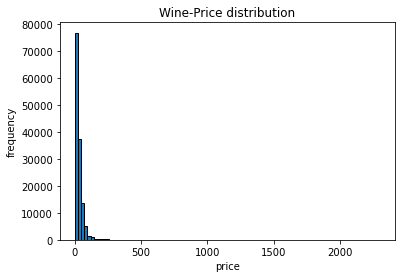

In [11]:
#price属性直方图
plt.hist(x=wine['price'], bins=100, edgecolor='black')
# 添加x轴和y轴标签
plt.xlabel('price')
plt.ylabel('frequency')
# 添加标题
plt.title('Wine-Price distribution')
plt.savefig('./wineResult/price_distribution_hist.png')
plt.show()

**price属性盒图**

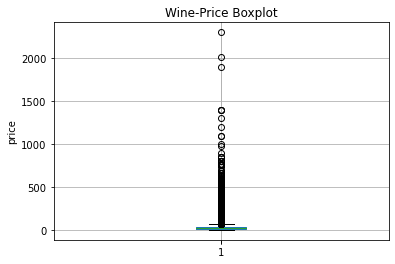

In [10]:
#price属性盒图(不丢弃缺失值情况)
priceNa = pd.DataFrame(pd.read_csv('winemag-data_first150k.csv').price)
priceNa.boxplot(sym='o')
plt.boxplot(wine['price'], sym='o')
plt.ylabel('price')
plt.title('Wine-Price Boxplot')
#plt.legend()
plt.savefig('./wineResult/price_box.png')
plt.show()

**price属性Q-Q图**  

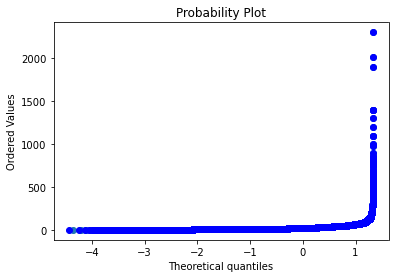

In [11]:
#price属性QQ图(不丢弃缺失值)
sorted_ = np.sort(wine['price'])
yvals = np.arange(len(sorted_))/float(len(sorted_))
x_label = stats.norm.ppf(yvals)
plt.scatter(x_label, sorted_)
stats.probplot(wine['price'], dist="norm", plot=plt)
plt.savefig('./wineResult/price_qq.png')
plt.show()

(2)**points属性直方图**

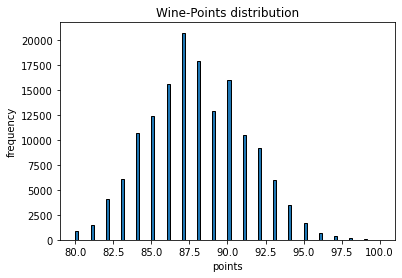

In [12]:
#points属性直方图
plt.hist(x=wine['points'], bins=100, edgecolor='black')
# 添加x轴和y轴标签
plt.xlabel('points')
plt.ylabel('frequency')
# 添加标题
plt.title('Wine-Points distribution')
plt.savefig('./wineResult/points_distribution_hist.png')
plt.show()

**points属性盒图**  

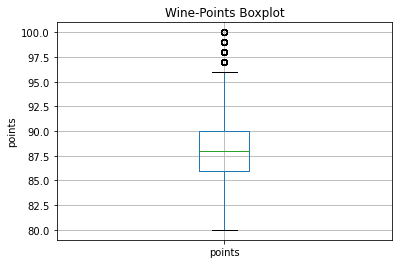

In [14]:
#points属性盒图(不丢弃缺失值情况)
priceNa = pd.DataFrame(pd.read_csv('winemag-data_first150k.csv').points)
priceNa.boxplot(sym='o')
plt.ylabel('points')
plt.title('Wine-Points Boxplot')
plt.savefig('./wineResult/points_box.png')
plt.show()

**points属性Q-Q图**  

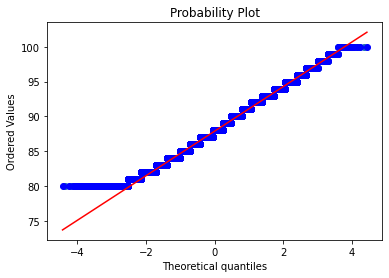

In [15]:
#points属性QQ图(不丢弃缺失值)
sorted_ = np.sort(wine['points'])
yvals = np.arange(len(sorted_))/float(len(sorted_))
x_label = stats.norm.ppf(yvals)
plt.scatter(x_label, sorted_)
stats.probplot(wine['points'], dist="norm", plot=plt)
plt.savefig('./wineResult/points_qq.png')
plt.show()

### 2.2 数据缺失的处理
观察数据集中缺失数据，分析其缺失的原因。分别使用下列四种策略对缺失值进行处理:  
由于属性值较多，这里数值属性我们以price数值属性为例，标称属性我们以country为例；  

**属性值缺失的原因可能为**：红酒数据收集是数据缺失  

#### 2.2.1 将缺失部分剔除
(这里直接展示剔除缺失值之后与原数据集的对比可视化)  
**price直方图**(前者为丢弃数据后直方图，后者为原始数据直方图)

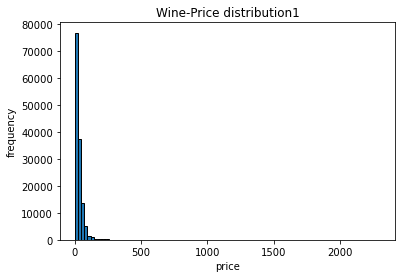

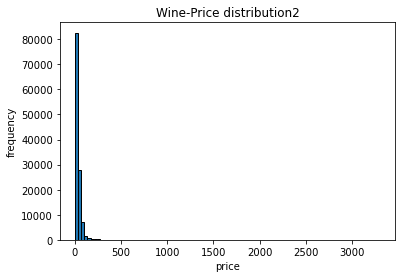

In [16]:
#原始数据集（去重处理后）
wineV2 = pd.DataFrame(pd.read_csv('winemag-data-130k-v2.csv'))

#删除price的缺失值画直方图
plt.hist(wine['price'].dropna(), bins=100, edgecolor='black')
# 添加x轴和y轴标签
plt.xlabel('price')
plt.ylabel('frequency')
# 添加标题
plt.title('Wine-Price distribution1')
plt.savefig('./wineResult/price_delete_hist.png')
plt.show()

#原始直方图
plt.hist(wineV2['price'], bins=100, edgecolor='black')
# 添加x轴和y轴标签
plt.xlabel('price')
plt.ylabel('frequency')
# 添加标题
plt.title('Wine-Price distribution2')
plt.savefig('./wineResult/priceCom_hist.png')
plt.show()

**country直方图**(前者为丢弃数据后直方图，后者为原始数据直方图)

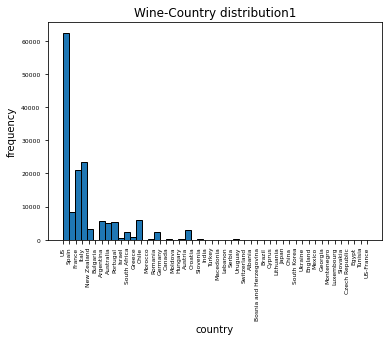

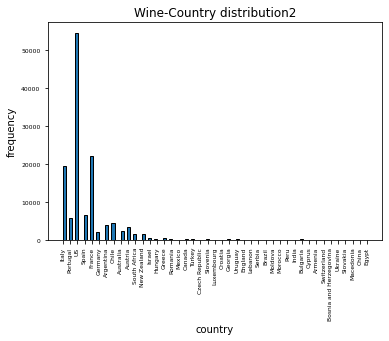

In [19]:
#country属性删除缺失值
#直方图
plt.hist(wine['country'].dropna(), bins=50, edgecolor='black')
# 添加x轴和y轴标签
plt.xlabel('country')
plt.ylabel('frequency')
# 添加标题
plt.title('Wine-Country distribution1')
plt.xticks(rotation=90)
plt.tick_params(labelsize=6)
plt.savefig('./wineResult/country_delete_hist.png')
plt.show()
#原始
plt.hist(wineV2['country'].dropna(), bins=100, edgecolor='black')
# 添加x轴和y轴标签
plt.xlabel('country')
plt.ylabel('frequency')
# 添加标题
plt.title('Wine-Country distribution2')
plt.xticks(rotation=90)
plt.tick_params(labelsize=6)
plt.savefig('./wineResult/countryCom_hist.png')
plt.show()

**price盒图**(前者为丢弃数据后盒图，后者为原始数据盒图)

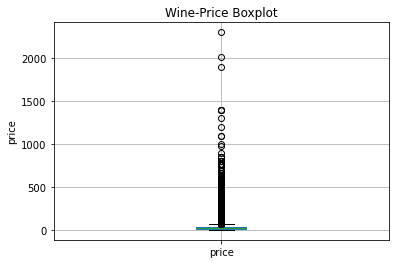

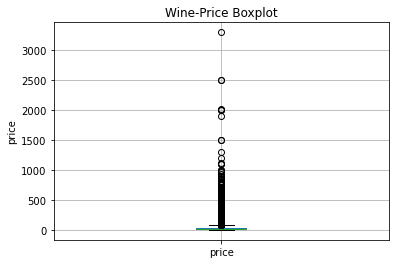

In [20]:
#price属性删除缺失值盒图
priceNa = pd.DataFrame(pd.read_csv('winemag-data_first150k.csv').price).dropna()
priceNa.boxplot(sym='o')
plt.ylabel('price')
plt.title('Wine-Price Boxplot')
plt.savefig('./wineResult/price_delete_box.png')
plt.show()

#原始数据盒图
priceNa = pd.DataFrame(pd.read_csv('winemag-data-130k-v2.csv').price)
priceNa.boxplot(sym='o')
plt.ylabel('price')
plt.title('Wine-Price Boxplot')
plt.savefig('./wineResult/priceCom_box.png')
plt.show()

**priceQ-Q图**(前者为丢弃数据后Q-Q图，后者为原始数据Q-Q图)  

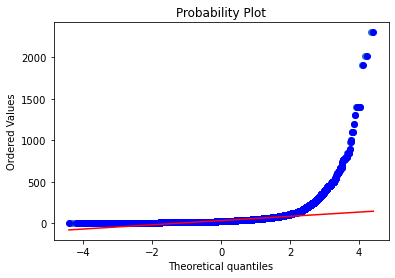

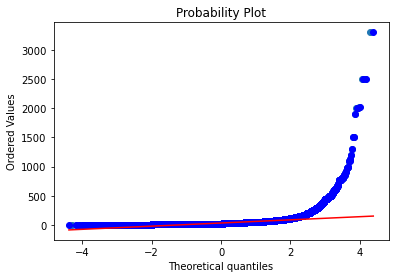

In [21]:
#price属性删除缺失值Q-Q图
sorted_ = np.sort(wine['price'].dropna())
yvals = np.arange(len(sorted_))/float(len(sorted_))
x_label = stats.norm.ppf(yvals)
plt.scatter(x_label, sorted_)
stats.probplot(wine['price'].dropna(), dist="norm", plot=plt)
plt.savefig('./wineResult/price_delete_qq.png')
plt.show()
#原始数据Q-Q图
sorted_ = np.sort(wineV2['price'].dropna())
yvals = np.arange(len(sorted_))/float(len(sorted_))
x_label = stats.norm.ppf(yvals)
plt.scatter(x_label, sorted_)
stats.probplot(wineV2['price'].dropna(), dist="norm", plot=plt)
plt.savefig('./wineResult/priceCom_qq.png')
plt.show()

#### 2.2.2 用最高频率值来填补缺失值  
**price直方图**(前者为利用众数填充缺失值后直方图，后者为原始数据直方图)

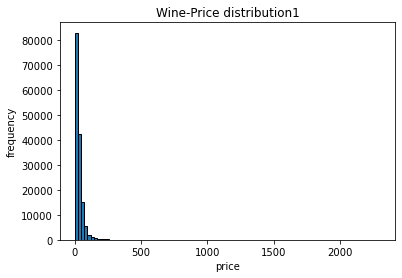

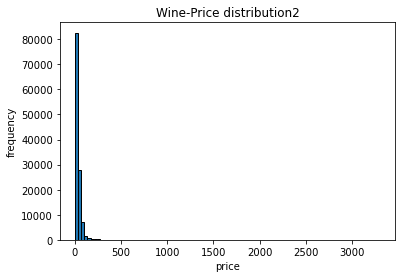

In [24]:
plt.hist(wine['price'].fillna(wine['price'].interpolate(missing_values='NaN', strategy='mode', axis=0, verbose=0, copy=True)),
         bins=100, edgecolor='black')
# 添加x轴和y轴标签
plt.xlabel('price')
plt.ylabel('frequency')
# 添加标题
plt.title('Wine-Price distribution1')
plt.savefig('./wineResult/price_mode_hist.png')
plt.show()

#原始直方图
plt.hist(wineV2['price'], bins=100, edgecolor='black')
# 添加x轴和y轴标签
plt.xlabel('price')
plt.ylabel('frequency')
# 添加标题
plt.title('Wine-Price distribution2')
#plt.savefig('./wineResult/priceCom_hist.png')
plt.show()

**country直方图**(前者为利用众数填充缺失值后直方图，后者为原始数据直方图)

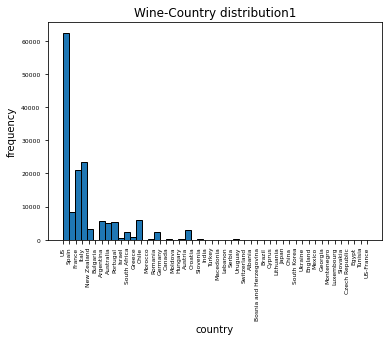

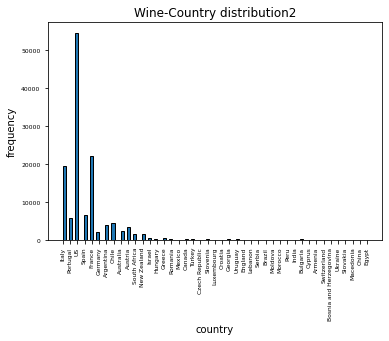

In [26]:
#country属性最高频率填充缺失值
#直方图
plt.hist(wine['country'].fillna('US'), bins=50, edgecolor='black')
# 添加x轴和y轴标签
plt.xlabel('country')
plt.ylabel('frequency')
# 添加标题
plt.title('Wine-Country distribution1')
plt.xticks(rotation=90)
plt.tick_params(labelsize=6)
plt.savefig('./wineResult/country_mode_hist.png')
plt.show()

plt.hist(wineV2['country'].dropna(), bins=100, edgecolor='black')
# 添加x轴和y轴标签
plt.xlabel('country')
plt.ylabel('frequency')
# 添加标题
plt.title('Wine-Country distribution2')
plt.xticks(rotation=90)
plt.tick_params(labelsize=6)
#plt.savefig('./wineResult/countryCom_hist.png')
plt.show()

**price盒图** (前者为利用众数填充缺失值后盒图，后者为原始数据盒图)

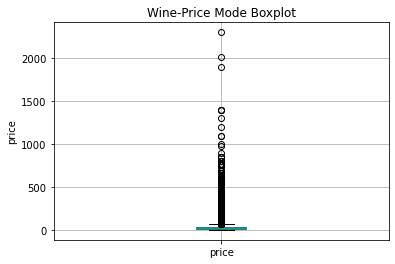

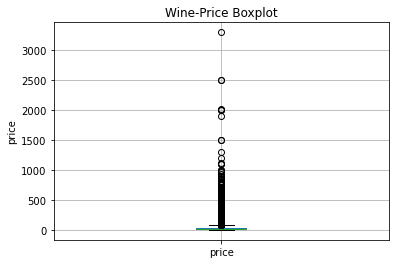

In [28]:
#盒图
priceNa = pd.DataFrame(pd.read_csv('winemag-data_first150k.csv').price).fillna(wine['price'].interpolate(missing_values='NaN', strategy='mode',
                                                           axis=0, verbose=0, copy=True))
priceNa.boxplot(sym='o')
plt.ylabel('price')
plt.title('Wine-Price Mode Boxplot')
plt.savefig('./wineResult/price_mode_box.png')
plt.show()

#原始数据盒图
priceNa = pd.DataFrame(pd.read_csv('winemag-data-130k-v2.csv').price)
priceNa.boxplot(sym='o')
plt.ylabel('price')
plt.title('Wine-Price Boxplot')
# plt.savefig('./wineResult/priceCom_box.png')
plt.show()

**priceQ-Q图** (前者为利用众数填充缺失值后Q-Q图，后者为原始数据Q-Q图)

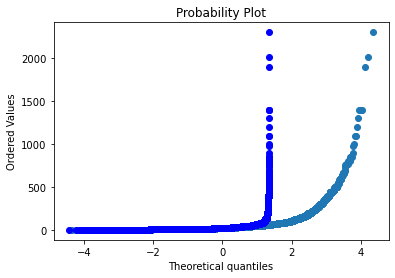

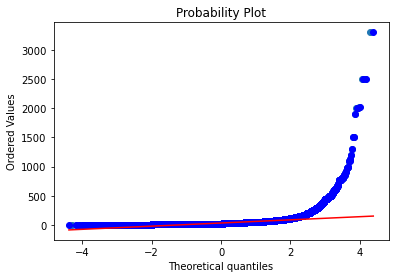

In [32]:
#Q-Q图
sorted_ = np.sort(wine['price'].fillna(wine['price'].interpolate(missing_values='NaN', strategy='mode', axis=0, verbose=0, copy=True)))
yvals = np.arange(len(sorted_))/float(len(sorted_))
x_label = stats.norm.ppf(yvals)
plt.scatter(x_label, sorted_)
stats.probplot(wine['price'], dist="norm", plot=plt)
plt.savefig('./wineResult/price_mode_qq.png')
plt.show()

#原始数据Q-Q图
sorted_ = np.sort(wineV2['price'].dropna())
yvals = np.arange(len(sorted_))/float(len(sorted_))
x_label = stats.norm.ppf(yvals)
plt.scatter(x_label, sorted_)
stats.probplot(wineV2['price'].dropna(), dist="norm", plot=plt)
#plt.savefig('./wineResult/priceCom_qq.png')
plt.show()

#### 2.2.3 通过属性的相关关系来填补缺失值  
使用中位数插值算法填补缺失值  
**price直方图**(前者利用中位数填充缺失值后直方图，后者为原始数据直方图)    

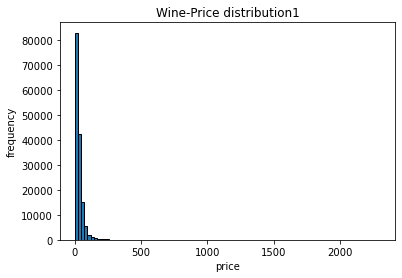

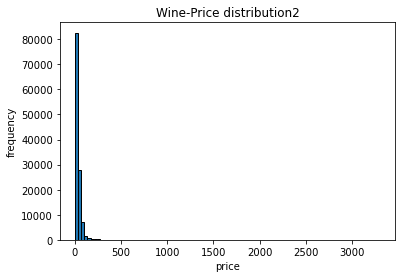

In [35]:
#通过属性的相关关系来填补缺失值
wine = pd.DataFrame(pd.read_csv('winemag-data_first150k.csv'))
#直方图
plt.hist(wine['price'].interpolate(missing_values='NaN', strategy='median', axis=0, verbose=0, copy=True),
         bins=100, edgecolor='black')
# 添加x轴和y轴标签
plt.xlabel('price')
plt.ylabel('frequency')
# 添加标题
plt.title('Wine-Price distribution1')
plt.savefig('./wineResult/price_means_hist.png')
plt.show()

#原始直方图
plt.hist(wineV2['price'], bins=100, edgecolor='black')
# 添加x轴和y轴标签
plt.xlabel('price')
plt.ylabel('frequency')
# 添加标题
plt.title('Wine-Price distribution2')
#plt.savefig('./wineResult/priceCom_hist.png')
plt.show()

**country直方图** (前者为利用随机森林算法填充缺失值后直方图，后者为原始数据直方图)  

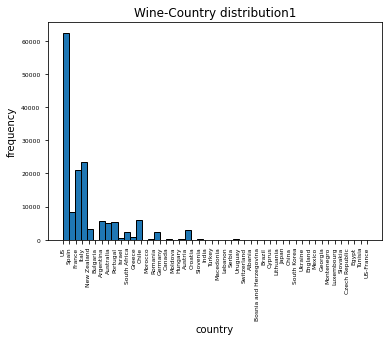

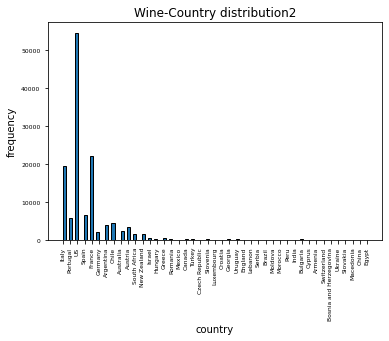

In [36]:
#随进森林实现填充country属性缺失值
wine = pd.DataFrame(pd.read_csv('winemag-data_first150k.csv'))
known_price = wine[wine['country'].notnull()]
unknown_price = wine[wine['country'].isnull()]
x = known_price[['points']]
y = known_price[['country']]
t_x = unknown_price[['points']]
fc = RandomForestClassifier()
fc.fit(x, y.values.ravel())
pr = fc.predict(t_x)
wine.loc[wine.country.isnull(), 'country'] = pr

plt.hist(wine['country'], bins=50, edgecolor='black')
# 添加x轴和y轴标签
plt.xlabel('country')
plt.ylabel('frequency')
# 添加标题
plt.title('Wine-Country distribution1')
plt.xticks(rotation=90)
plt.tick_params(labelsize=6)
plt.savefig('./wineResult/country_relative_hist.png')
plt.show()

plt.hist(wineV2['country'].dropna(), bins=100, edgecolor='black')
# 添加x轴和y轴标签
plt.xlabel('country')
plt.ylabel('frequency')
# 添加标题
plt.title('Wine-Country distribution2')
plt.xticks(rotation=90)
plt.tick_params(labelsize=6)
#plt.savefig('./wineResult/countryCom_hist.png')
plt.show()

**price盒图**(前者为利用中位数填充缺失值后盒图，后者为原始数据盒图)

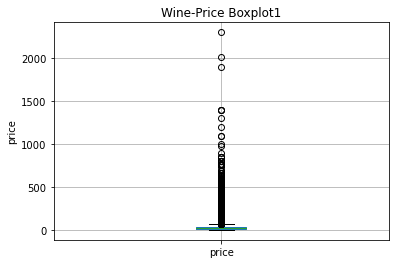

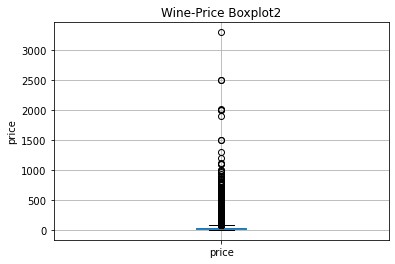

In [37]:
#盒图
priceNa = pd.DataFrame(pd.read_csv('winemag-data_first150k.csv').price).fillna(wine['price'].interpolate(missing_values='NaN', strategy='median',
                                                                                                         axis=0, verbose=0, copy=True))
priceNa.boxplot(sym='o')
plt.ylabel('price')
plt.title('Wine-Price Boxplot1')
plt.savefig('./wineResult/price_median_box.png')
plt.show()

#原始数据盒图
priceNa = pd.DataFrame(pd.read_csv('winemag-data-130k-v2.csv').price)
priceNa.boxplot(sym='o')
plt.ylabel('price')
plt.title('Wine-Price Boxplot2')
# plt.savefig('./wineResult/priceCom_box.png')
plt.show()

**priceQ-Q图**(前者为利用中位数填充缺失值后Q-Q图，后者为原始数据Q-Q图)

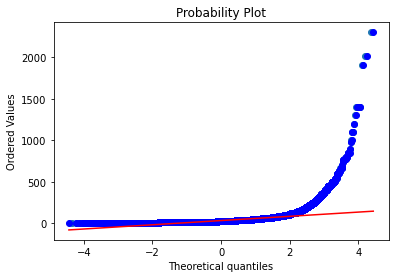

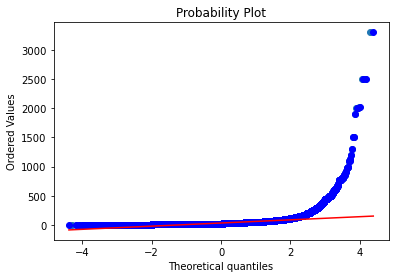

In [38]:
#Q-Q图
sorted_ = np.sort(wine['price'].interpolate(missing_values='NaN', strategy='median', axis=0, verbose=0, copy=True))
yvals = np.arange(len(sorted_))/float(len(sorted_))
x_label = stats.norm.ppf(yvals)
plt.scatter(x_label, sorted_)
stats.probplot(wine['price'].interpolate(missing_values = 'NaN', strategy='median', axis=0, verbose=0, copy=True), dist="norm", plot=plt)
plt.savefig('./wineResult/price_median_qq.png')
plt.show()

#原始数据Q-Q图
sorted_ = np.sort(wineV2['price'].dropna())
yvals = np.arange(len(sorted_))/float(len(sorted_))
x_label = stats.norm.ppf(yvals)
plt.scatter(x_label, sorted_)
stats.probplot(wineV2['price'].dropna(), dist="norm", plot=plt)
#plt.savefig('./wineResult/priceCom_qq.png')
plt.show()

#### 2.2.4 通过数据对象之间的相似性来填补缺失值  
利用随机森林预测值来填充缺失值  
**price直方图**(前者为利用随机森林预测值填充缺失值后直方图，后者为原始数据直方图)   

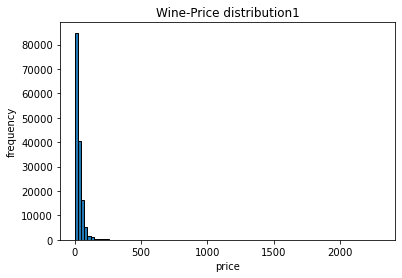

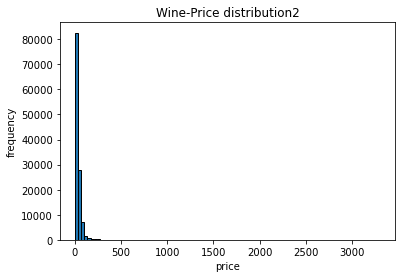

In [39]:
#通过数据对象之间的相似性来填补缺失值
wine = pd.DataFrame(pd.read_csv('winemag-data_first150k.csv'))
known_price = wine[wine['price'].notnull()]
unknown_price = wine[wine['price'].isnull()]
x = known_price[['points']]
y = known_price[['price']]
t_x = unknown_price[['points']]
fc = RandomForestClassifier()
fc.fit(x, y.values.ravel())
pr = fc.predict(t_x)
wine.loc[wine.price.isnull(), 'price'] = pr

#直方图
plt.hist(wine['price'], bins=100, edgecolor='black')
# 添加x轴和y轴标签
plt.xlabel('price')
plt.ylabel('frequency')
# 添加标题
plt.title('Wine-Price distribution1')
plt.savefig('./wineResult/price_relative_hist.png')
plt.show()

#原始直方图
plt.hist(wineV2['price'], bins=100, edgecolor='black')
# 添加x轴和y轴标签
plt.xlabel('price')
plt.ylabel('frequency')
# 添加标题
plt.title('Wine-Price distribution2')
#plt.savefig('./wineResult/priceCom_hist.png')
plt.show()

**price盒图**(前者为利用随机森林预测值填充缺失值后盒图，后者为袁姗姗数据盒图)   

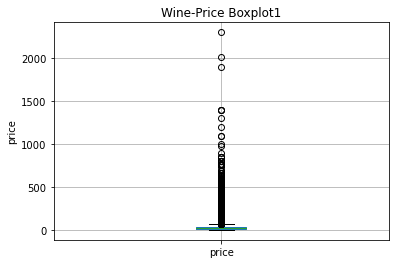

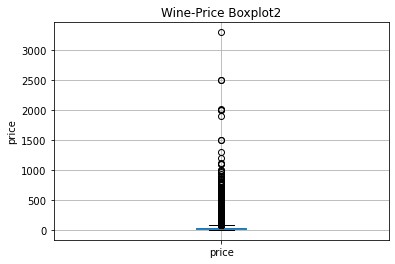

In [40]:
#盒图
priceNa = pd.DataFrame(pd.read_csv('winemag-data_first150k.csv').price)
priceNa.boxplot(sym='o')
plt.ylabel('price')
plt.title('Wine-Price Boxplot1')
plt.savefig('./wineResult/price_relative_box.png')
plt.show()

#原始数据盒图
priceNa = pd.DataFrame(pd.read_csv('winemag-data-130k-v2.csv').price)
priceNa.boxplot(sym='o')
plt.ylabel('price')
plt.title('Wine-Price Boxplot2')
# plt.savefig('./wineResult/priceCom_box.png')
plt.show()

**priceQ-Q图**(前者为利用随机森林预测值填充缺失值后Q-Q图，后者为原始数据Q-Q图)

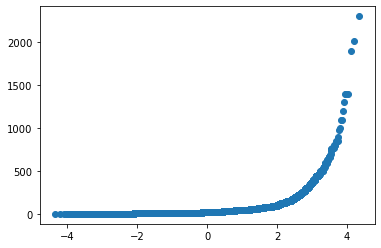

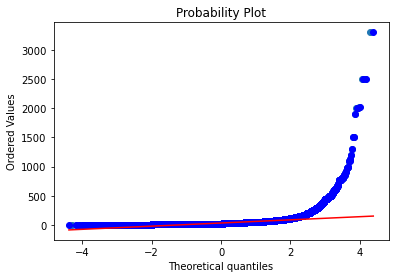

In [41]:
#Q-Q图
sorted_ = np.sort(wine['price'])
yvals = np.arange(len(sorted_))/float(len(sorted_))
x_label = stats.norm.ppf(yvals)
plt.scatter(x_label, sorted_)
stats.probplot(wine['price'])
plt.savefig('./wineResult/price_relative_qq.png')
plt.show()


#原始数据Q-Q图
sorted_ = np.sort(wineV2['price'].dropna())
yvals = np.arange(len(sorted_))/float(len(sorted_))
x_label = stats.norm.ppf(yvals)
plt.scatter(x_label, sorted_)
stats.probplot(wineV2['price'].dropna(), dist="norm", plot=plt)
#plt.savefig('./wineResult/priceCom_qq.png')
plt.show()

## 分析报告二
### 1.数据集选择
Trending YouTube Video Statistics  
该数据集中csv个数较多，选择其中四个做分析：USvideos.csv、CAvideos.csv、INvideos.csv、MXvideos.csv  

### 2.数据分析要求
#### 2.1 数据可视化及摘要
2.1.1 **标称属性**，给出每个可能取值的频数   
该数据集中标称属性有：category_id、title、channel_title  
此处以category_id为例作展示  
**Name: category_id, dtype: int64**

In [42]:
#导入需要的第三方库
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

USvideo = pd.DataFrame(pd.read_csv('./archive/USvideos.csv', low_memory=False))
CAvideo = pd.DataFrame(pd.read_csv('./archive/CAvideos.csv', low_memory=False))
INvideo = pd.DataFrame(pd.read_csv('./archive/INvideos.csv', low_memory=False))
DEvideo = pd.DataFrame(pd.read_csv('./archive/DEvideos.csv', low_memory=False))

#category_id标称属性，每个可能取值的频数
print(USvideo['category_id'].value_counts())
print(CAvideo['category_id'].value_counts())
print(INvideo['category_id'].value_counts())
print(DEvideo['category_id'].value_counts())

24    9964
10    6472
26    4146
23    3457
22    3210
25    2487
28    2401
1     2345
17    2174
27    1656
15     920
20     817
19     402
2      384
29      57
43      57
Name: category_id, dtype: int64
24    13451
25     4159
22     4105
23     3773
10     3731
17     2787
1      2060
26     2007
20     1344
28     1155
27      991
19      392
15      369
2       353
43      124
29       74
30        6
Name: category_id, dtype: int64
24    16712
25     5241
10     3858
23     3429
22     2624
1      1658
27     1227
26      845
17      731
28      552
43      205
29      105
2        72
20       66
30       16
19        8
15        3
Name: category_id, dtype: int64
24    15292
22     5988
25     2935
17     2752
23     2534
1      2376
10     2372
26     1745
20     1565
2       873
27      844
28      806
29      256
15      251
19      141
43      107
30        2
44        1
Name: category_id, dtype: int64


| USvideo-category_id | 频数 |           | CAvideo-category_id | 频数 |
| :-----: | :-----: |                   | :-----: | :-----: |
| 24 | 9964 |                           | 24 | 13451 |
| 10 | 6472 |                           | 25 |  4159 |
| 26 | 4146 |                           | 22 |  4105 |
| 23 | 3457 |                           | 23 |  3773 |
| 22 | 3210 |                           | 10 |  3731 |
| 25 | 2487 |                           | 17 |  2787 |
| 28 | 2401 |                           |  1 |  2060 |
| 1  | 2345 |                           | 26 |  2007 |
| 17 | 2174 |                           | 20 |  1344 |
| 27 | 1656 |                           | 28 |  1155 |
| 15 |  920 |                           | 27 |   991 |
| 20 |  817 |                           | 19 |   392 |
| 19 |  402 |                           | 15 |   369 |
| 2  |  384 |                           |  2 |   353 | 
| 29 |   57 |                           | 43 |   124 |
| 43 |   57 |                           | 29 |    74 | 
                                        | 30 |     6 |
                                        
| INvideo-category_id | 频数 |           | DEvideo-category_id | 频数 |
| :-----: | :-----: |                   | :-----: | :-----: |
| 24 | 16712 |                          | 24 | 15292 |
| 25 | 5241 |                           | 22 |  5988 |
| 10 | 3858 |                           | 25 |  2935 |
| 23 | 3429 |                           | 17 |  2752 |
| 22 | 2624 |                           | 23 |  2534 |
|  1 | 1658 |                           |  1 |  2376 |
| 27 | 1227 |                           | 10 |  2372 |
| 26 |  845 |                           | 26 |  1745 |
| 17 |  731 |                           | 20 |  1565 |
| 28 |  552 |                           |  2 |   873 |
| 43 |  205 |                           | 27 |   844 |
| 29 |  105 |                           | 28 |   806 |
|  2 |   72 |                           | 29 |   256 |
| 20 |   66 |                           | 15 |   251 | 
| 30 |   16 |                           | 19 |   141 |
| 19 |    8 |                           | 43 |   107 | 
| 15 |    3 |                           | 30 |     2 |
                                        | 44 |     1 |

**category_id属性直方图**


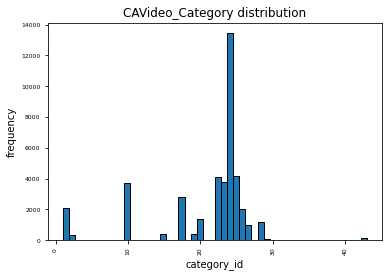

In [43]:
#CAcategory_id属性直方图
plt.hist(x=CAvideo['category_id'], bins=50, edgecolor='black')
# 添加x轴和y轴标签
plt.xlabel('category_id')
plt.ylabel('frequency')
# 添加标题
plt.title('CAVideo_Category distribution')
plt.xticks(rotation=90)
plt.tick_params(labelsize=6)
plt.savefig('./videoResult/CA/CAcategory_distribution_hist.png')
plt.show()


#### 2.1.2 数值属性，给出数值属性的五数概括及缺失值的个数
该数据集中数值属性有：views、likes、dislikes、comment_count    
**Name: views, dtype: float64**

In [54]:
#views数值属性五数概括
np.set_printoptions(suppress=True)
print(USvideo['views'].dropna().astype(int).describe())
print(CAvideo['views'].dropna().astype(int).describe())
print(INvideo['views'].dropna().astype(int).describe())
print(DEvideo['views'].dropna().astype(int).describe())

count    4.094900e+04
mean     2.360785e+06
std      7.394114e+06
min      5.490000e+02
25%      2.423290e+05
50%      6.818610e+05
75%      1.823157e+06
max      2.252119e+08
Name: views, dtype: float64
count    4.088100e+04
mean     1.147036e+06
std      3.390913e+06
min      7.330000e+02
25%      1.439020e+05
50%      3.712040e+05
75%      9.633020e+05
max      1.378431e+08
Name: views, dtype: float64
count    3.735200e+04
mean     1.060478e+06
std      3.184932e+06
min      4.024000e+03
25%      1.239155e+05
50%      3.045860e+05
75%      7.992912e+05
max      1.254322e+08
Name: views, dtype: float64
count    4.084000e+04
mean     6.034553e+05
std      2.348963e+06
min      5.180000e+02
25%      2.706875e+04
50%      1.192770e+05
75%      4.431015e+05
max      1.138762e+08
Name: views, dtype: float64


| US-views   |            |   | CA-views   |            |   | IN-views   |            |   | DE-views   |            | 
| :-----: | :-----: |         | :-----: | :-----: |         | :-----: | :-----: |         | :-----: | :-----: |       
| count      |    40949.00|   | count      |    40881.00|   | count      |    37352.00|   | count      |    40840.00| 
| mean       |  2360785.00|   | mean       |  1147036.00|   | mean       |  1060478.00|   | mean       |   603455.30| 
| std        |  7394114.00|   | std        |  3390913.00|   | std        |  3184932.00|   | std        |  2348963.00|
| min        |      549.00|   | min        |      733.00|   | min        |     4024.00|   | min        |      518.00|
| 25%        |   242329.00|   | 25%        |   143902.00|   | 25%        |   123915.50|   | 25%        |    27068.75|
| 50%        |   681861.00|   | 50%        |   371204.00|   | 50%        |   304586.00|   | 50%        |   119277.00|
| 75%        |  1823157.00|   | 75%        |   963302.00|   | 75%        |   799291.20|   | 75%        |   443101.50|
| max        |182315700.00|   | max        |137843100.00|   | max        |125432200.00|   | max        |113876200.00| 

**Name: likes, dtype: float64**  

In [44]:
#likes数值属性五数概括
np.set_printoptions(suppress=True)
print(USvideo['likes'].dropna().astype(int).describe())
print(CAvideo['likes'].dropna().astype(int).describe())
print(INvideo['likes'].dropna().astype(int).describe())
print(DEvideo['likes'].dropna().astype(int).describe())

count    4.094900e+04
mean     7.426670e+04
std      2.288853e+05
min      0.000000e+00
25%      5.424000e+03
50%      1.809100e+04
75%      5.541700e+04
max      5.613827e+06
Name: likes, dtype: float64
count    4.088100e+04
mean     3.958269e+04
std      1.326895e+05
min      0.000000e+00
25%      2.191000e+03
50%      8.780000e+03
75%      2.871700e+04
max      5.053338e+06
Name: likes, dtype: float64
count    3.735200e+04
mean     2.708272e+04
std      9.714510e+04
min      0.000000e+00
25%      8.640000e+02
50%      3.069000e+03
75%      1.377425e+04
max      2.912710e+06
Name: likes, dtype: float64
count    4.084000e+04
mean     2.187550e+04
std      1.018000e+05
min      0.000000e+00
25%      5.330000e+02
50%      2.699000e+03
75%      1.179625e+04
max      4.924056e+06
Name: likes, dtype: float64


| US-views   |            |   | CA-views   |            |   | IN-views   |            |   | DE-views   |            | 
| :-----: | :-----: |         | :-----: | :-----: |         | :-----: | :-----: |         | :-----: | :-----: |       
| count      |4.094900e+04|   | count      |4.088100e+04|   | count      |3.735200e+04|   | count      |4.084000e+04| 
| mean       |7.426670e+04|   | mean       |3.958269e+04|   | mean       |2.708272e+04|   | mean       |2.187550e+04| 
| std        |2.288853e+05|   | std        |1.326895e+05|   | std        |9.714510e+04|   | std        |1.018000e+05|
| min        |0.000000e+00|   | min        |0.000000e+00|   | min        |0.000000e+00|   | min        |0.000000e+00|
| 25%        |5.424000e+03|   | 25%        |2.191000e+03|   | 25%        |8.640000e+02|   | 25%        |5.330000e+02|
| 50%        |1.809100e+04|   | 50%        |8.780000e+03|   | 50%        |3.069000e+03|   | 50%        |2.699000e+03|
| 75%        |5.541700e+04|   | 75%        |2.871700e+04|   | 75%        |1.377425e+04|   | 75%        |1.179625e+04|
| max        |5.613827e+06|   | max        |5.053338e+06|   | max        |2.912710e+06|   | max        |4.924056e+06| 

**Name: dislikes, dtype: float64**  

In [45]:
#dislikes数值属性五数概括
np.set_printoptions(suppress=True)
print(USvideo['dislikes'].dropna().astype(int).describe())
print(CAvideo['dislikes'].dropna().astype(int).describe())
print(INvideo['dislikes'].dropna().astype(int).describe())
print(DEvideo['dislikes'].dropna().astype(int).describe())

count    4.094900e+04
mean     3.711401e+03
std      2.902971e+04
min      0.000000e+00
25%      2.020000e+02
50%      6.310000e+02
75%      1.938000e+03
max      1.674420e+06
Name: dislikes, dtype: float64
count    4.088100e+04
mean     2.009195e+03
std      1.900837e+04
min      0.000000e+00
25%      9.900000e+01
50%      3.030000e+02
75%      9.500000e+02
max      1.602383e+06
Name: dislikes, dtype: float64
count    3.735200e+04
mean     1.665082e+03
std      1.607617e+04
min      0.000000e+00
25%      1.080000e+02
50%      3.260000e+02
75%      1.019250e+03
max      1.545017e+06
Name: dislikes, dtype: float64
count    4.084000e+04
mean     1.397136e+03
std      1.457738e+04
min      0.000000e+00
25%      2.900000e+01
50%      1.340000e+02
75%      5.320000e+02
max      1.470386e+06
Name: dislikes, dtype: float64


| US-views   |            |   | CA-views   |            |   | IN-views   |            |   | DE-views   |            | 
| :-----: | :-----: |         | :-----: | :-----: |         | :-----: | :-----: |         | :-----: | :-----: |       
| count      |4.094900e+04|   | count      |4.088100e+04|   | count      |3.735200e+04|   | count      |4.084000e+04| 
| mean       |3.711401e+03|   | mean       |2.009195e+03|   | mean       |1.665082e+03|   | mean       |1.397136e+03| 
| std        |2.902971e+04|   | std        |1.900837e+04|   | std        |1.607617e+04|   | std        |1.457738e+04|
| min        |0.000000e+00|   | min        |0.000000e+00|   | min        |0.000000e+00|   | min        |0.000000e+00|
| 25%        |2.020000e+02|   | 25%        |9.900000e+01|   | 25%        |1.080000e+02|   | 25%        |2.900000e+01|
| 50%        |6.310000e+02|   | 50%        |3.030000e+02|   | 50%        |3.260000e+02|   | 50%        |1.340000e+02|
| 75%        |1.938000e+03|   | 75%        |9.500000e+02|   | 75%        |1.019250e+03|   | 75%        |5.320000e+02|
| max        |1.674420e+06|   | max        |1.602383e+06|   | max        |1.545017e+06|   | max        |1.470386e+06| 

**Name: comment_count, dtype: float64**  

In [46]:
#comment_count数值属性五数概括
np.set_printoptions(suppress=True)
print(USvideo['comment_count'].dropna().astype(int).describe())
print(CAvideo['comment_count'].dropna().astype(int).describe())
print(INvideo['comment_count'].dropna().astype(int).describe())
print(DEvideo['comment_count'].dropna().astype(int).describe())

count    4.094900e+04
mean     8.446804e+03
std      3.743049e+04
min      0.000000e+00
25%      6.140000e+02
50%      1.856000e+03
75%      5.755000e+03
max      1.361580e+06
Name: comment_count, dtype: float64
count    4.088100e+04
mean     5.042975e+03
std      2.157902e+04
min      0.000000e+00
25%      4.170000e+02
50%      1.301000e+03
75%      3.713000e+03
max      1.114800e+06
Name: comment_count, dtype: float64
count     37352.00000
mean       2676.99743
std       14868.31713
min           0.00000
25%          81.00000
50%         329.00000
75%        1285.00000
max      827755.00000
Name: comment_count, dtype: float64
count    4.084000e+04
mean     2.785857e+03
std      1.745803e+04
min      0.000000e+00
25%      7.900000e+01
50%      3.760000e+02
75%      1.376000e+03
max      1.084435e+06
Name: comment_count, dtype: float64


| US-views   |            |   | CA-views   |            |   | IN-views   |            |   | DE-views   |            | 
| :-----: | :-----: |         | :-----: | :-----: |         | :-----: | :-----: |         | :-----: | :-----: |       
| count      |4.094900e+04|   | count      |4.088100e+04|   | count      | 37352.00000|   | count      |4.084000e+04| 
| mean       |8.446804e+03|   | mean       |5.042975e+03|   | mean       |  2676.99743|   | mean       |2.785857e+03| 
| std        |3.743049e+04|   | std        |2.157902e+04|   | std        | 14868.31713|   | std        |1.745803e+04|
| min        |0.000000e+00|   | min        |0.000000e+00|   | min        |     0.00000|   | min        |0.000000e+00|
| 25%        |6.140000e+02|   | 25%        |4.170000e+02|   | 25%        |    81.00000|   | 25%        |7.900000e+01|
| 50%        |1.856000e+03|   | 50%        |1.301000e+03|   | 50%        |   329.00000|   | 50%        |3.760000e+02|
| 75%        |5.755000e+03|   | 75%        |3.713000e+03|   | 75%        |  1285.00000|   | 75%        |1.376000e+03|
| max        |1.361580e+06|   | max        |1.114800e+06|   | max        |827755.00000|   | max        |1.084435e+06| 

各数据集的缺省值情况为  

| US-video缺失值 |  |         | CA-video缺失值 | |          | IN-video缺失值 | |          | DE-video缺失值 | |
| :----: | :----: |          | :----: | :----: |          | :----: | :----: |          | :----: | :----: |             
| video_id     | 0 |         | video_id     | 0 |         | video_id     | 0 |         | video_id     | 0 |     
| trending_date| 0 |         | trending_date| 0 |         | trending_date| 0 |         | trending_date| 0 |   
| title        | 0 |         | title        | 0 |         | title        | 0 |         | title        | 0 |
| channel_title| 0 |         | channel_title| 0 |         | channel_title| 0 |         | channel_title| 0 |
| category_id  | 0 |         | category_id  | 0 |         | category_id  | 0 |         | category_id  | 0 |
| publish_time | 0 |         | publish_time | 0 |         | publish_time | 0 |         | publish_time | 0 |
| tags         | 0 |         | tags         | 0 |         | tags         | 0 |         | tags         | 0 |
| views        | 0 |         | views        | 0 |         | views        | 0 |         | views        | 0 |
| likes        | 0 |         | likes        | 0 |         | likes        | 0 |         | likes        | 0 |
| dislikes     | 0 |         | dislikes     | 0 |         | dislikes     | 0 |         |dislikes      | 0 |
| comment_count| 0 |         | comment_count| 0 |         | comment_count| 0 |         | comment_count| 0 |
| thumbnail_link| 0 |        | thumbnail_link| 0 |        | thumbnail_link| 0 |        | thumbnail_link| 0 |
| comments_disabled| 0 |     | comments_disabled| 0 |     | comments_disabled| 0 |     | comments_disabled| 0 |
| ratings_disabled| 0 |      | ratings_disabled| 0 |      | ratings_disabled| 0 |      | ratings_disabled| 0 |
| video_error_or_removed| 0 || video_error_or_removed| 0 || video_error_or_removed| 0 || video_error_or_removed| 0 |
| description| 570 |         | description| 1296 |         | description| 561 |         | description| 1552 |        

**分析可知，均为description属性缺失，根据上述缺省值情况，进行缺失值填写后的数据可视化展示有问题，此处不做展示**

#### 2.1.2 数据可视化  
使用直方图、盒图等检查数据分布及离群点   
（这里给出views、likes属性的可视化展示）  
(1) **views直方图**

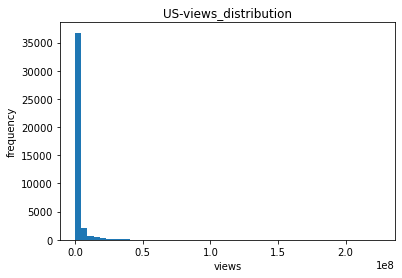

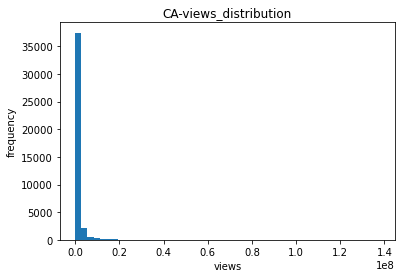

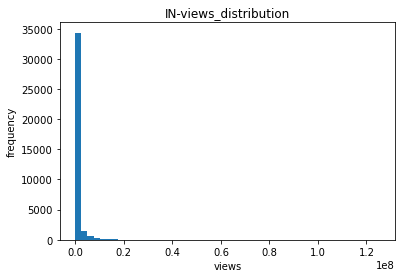

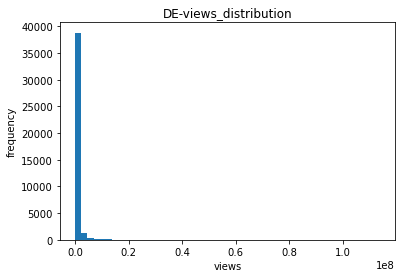

In [47]:
#views直方图
plt.hist(USvideo['views'].dropna().astype(int), bins=50)
# 添加x轴和y轴标签
plt.xlabel('views')
plt.ylabel('frequency')
# 添加标题
plt.title('US-views_distribution')
plt.savefig('./videoResult/US/USviews_hist.png')
plt.show()

plt.hist(CAvideo['views'].dropna().astype(int), bins=50)
# 添加x轴和y轴标签
plt.xlabel('views')
plt.ylabel('frequency')
# 添加标题
plt.title('CA-views_distribution')
plt.savefig('./videoResult/CA/CAviews_hist.png')
plt.show()

plt.hist(INvideo['views'].dropna().astype(int), bins=50)
# 添加x轴和y轴标签
plt.xlabel('views')
plt.ylabel('frequency')
# 添加标题
plt.title('IN-views_distribution')
plt.savefig('./videoResult/IN/INviews_hist.png')
plt.show()

plt.hist(DEvideo['views'].dropna().astype(int), bins=50)
# 添加x轴和y轴标签
plt.xlabel('views')
plt.ylabel('frequency')
# 添加标题
plt.title('DE-views_distribution')
plt.savefig('./videoResult/DE/DEviews_hist.png')
plt.show()

**likes直方图**

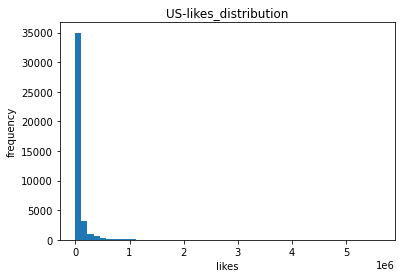

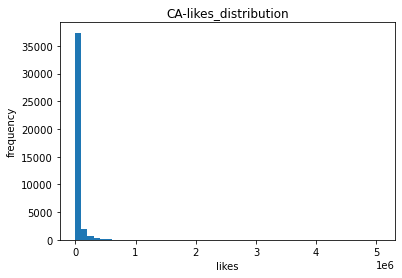

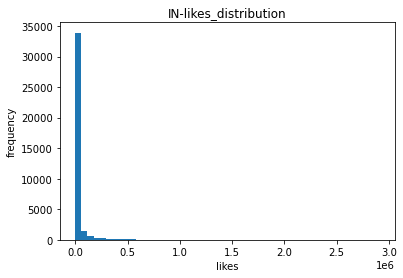

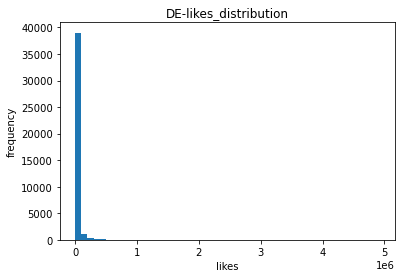

In [48]:
#likes直方图
plt.hist(USvideo['likes'].dropna().astype(int), bins=50)
# 添加x轴和y轴标签
plt.xlabel('likes')
plt.ylabel('frequency')
# 添加标题
plt.title('US-likes_distribution')
plt.savefig('./videoResult/US/USlikes_hist.png')
plt.show()

plt.hist(CAvideo['likes'].dropna().astype(int), bins=50)
# 添加x轴和y轴标签
plt.xlabel('likes')
plt.ylabel('frequency')
# 添加标题
plt.title('CA-likes_distribution')
plt.savefig('./videoResult/CA/CAlikes_hist.png')
plt.show()

plt.hist(INvideo['likes'].dropna().astype(int), bins=50)
# 添加x轴和y轴标签
plt.xlabel('likes')
plt.ylabel('frequency')
# 添加标题
plt.title('IN-likes_distribution')
plt.savefig('./videoResult/IN/INlikes_hist.png')
plt.show()

plt.hist(DEvideo['likes'].dropna().astype(int), bins=50)
# 添加x轴和y轴标签
plt.xlabel('likes')
plt.ylabel('frequency')
# 添加标题
plt.title('DE-likes_distribution')
plt.savefig('./videoResult/DE/DElikes_hist.png')
plt.show()

(2)**views盒图**  

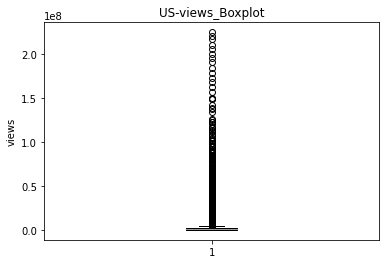

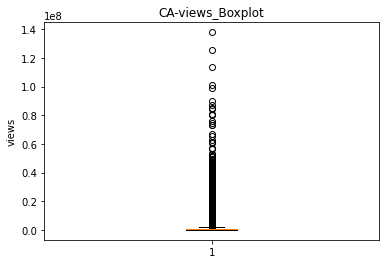

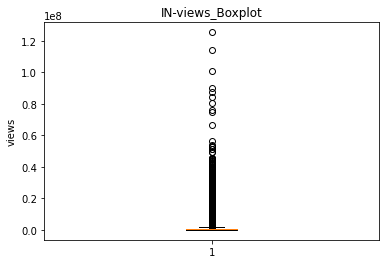

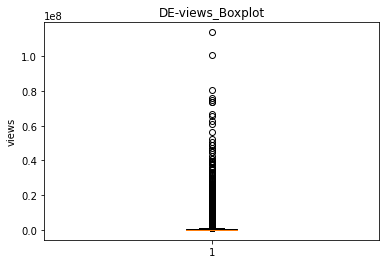

In [49]:
#views属性盒图
plt.boxplot(USvideo['views'].dropna().astype(int))
plt.ylabel('views')
plt.title('US-views_Boxplot')
plt.savefig('./videoResult/US/USviews_box.png')
plt.show()

plt.boxplot(CAvideo['views'].dropna().astype(int))
plt.ylabel('views')
plt.title('CA-views_Boxplot')
plt.savefig('./videoResult/CA/CAviews_box.png')
plt.show()

plt.boxplot(INvideo['views'].dropna().astype(int))
plt.ylabel('views')
plt.title('IN-views_Boxplot')
plt.savefig('./videoResult/IN/INviews_box.png')
plt.show()

plt.boxplot(DEvideo['views'].dropna().astype(int))
plt.ylabel('views')
plt.title('DE-views_Boxplot')
plt.savefig('./videoResult/DE/DEviews_box.png')
plt.show()

**likes盒图**

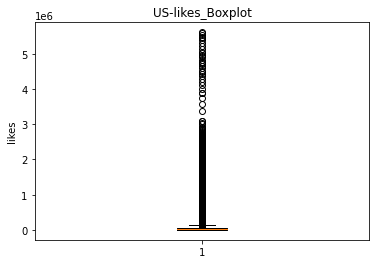

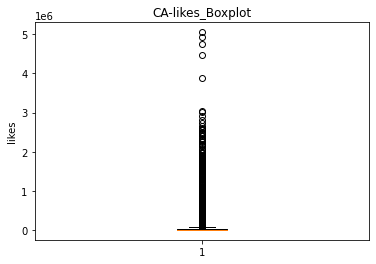

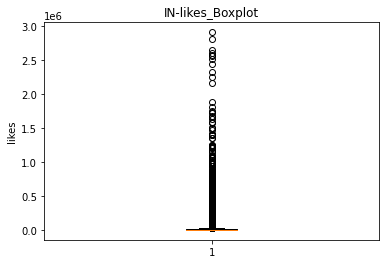

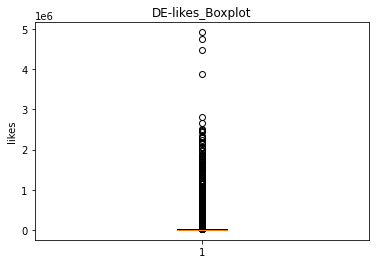

In [50]:
#likes属性盒图
plt.boxplot(USvideo['likes'].dropna().astype(int))
plt.ylabel('likes')
plt.title('US-likes_Boxplot')
plt.savefig('./videoResult/US/USlikes_box.png')
plt.show()

plt.boxplot(CAvideo['likes'].dropna().astype(int))
plt.ylabel('likes')
plt.title('CA-likes_Boxplot')
plt.savefig('./videoResult/CA/CAlikes_box.png')
plt.show()

plt.boxplot(INvideo['likes'].dropna().astype(int))
plt.ylabel('likes')
plt.title('IN-likes_Boxplot')
plt.savefig('./videoResult/IN/INlikes_box.png')
plt.show()

plt.boxplot(DEvideo['likes'].dropna().astype(int))
plt.ylabel('likes')
plt.title('DE-likes_Boxplot')
plt.savefig('./videoResult/DE/DElikes_box.png')
plt.show()

(3)**viewsQ-Q图**

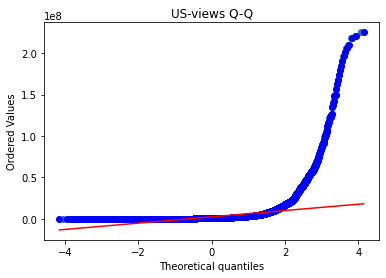

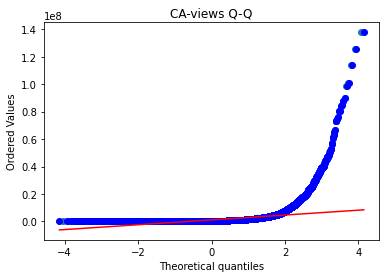

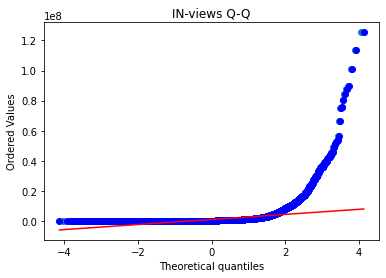

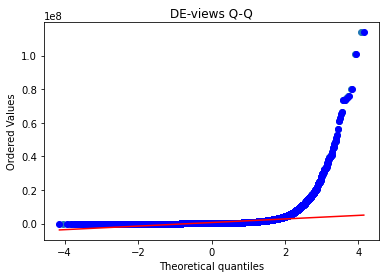

In [51]:
#views属性Q-Q图
sorted_ = np.sort(USvideo['views'].dropna().astype(int))
yvals = np.arange(len(sorted_))/float(len(sorted_))
x_label = stats.norm.ppf(yvals)
plt.scatter(x_label, sorted_)
stats.probplot(USvideo['views'].dropna().astype(int), dist="norm", plot=plt)
plt.title('US-views Q-Q')
plt.savefig('./videoResult/US/USviews_qq.png')
plt.show()

sorted_ = np.sort(CAvideo['views'].dropna().astype(int))
yvals = np.arange(len(sorted_))/float(len(sorted_))
x_label = stats.norm.ppf(yvals)
plt.scatter(x_label, sorted_)
stats.probplot(CAvideo['views'].dropna().astype(int), dist="norm", plot=plt)
plt.title('CA-views Q-Q')
plt.savefig('./videoResult/CA/CAviews_qq.png')
plt.show()

sorted_ = np.sort(INvideo['views'].dropna().astype(int))
yvals = np.arange(len(sorted_))/float(len(sorted_))
x_label = stats.norm.ppf(yvals)
plt.scatter(x_label, sorted_)
stats.probplot(INvideo['views'].dropna().astype(int), dist="norm", plot=plt)
plt.title('IN-views Q-Q')
plt.savefig('./videoResult/IN/INviews_qq.png')
plt.show()

sorted_ = np.sort(DEvideo['views'].dropna().astype(int))
yvals = np.arange(len(sorted_))/float(len(sorted_))
x_label = stats.norm.ppf(yvals)
plt.scatter(x_label, sorted_)
stats.probplot(DEvideo['views'].dropna().astype(int), dist="norm", plot=plt)
plt.title('DE-views Q-Q')
plt.savefig('./videoResult/DE/DEviews_qq.png')
plt.show()

**likesQ-Q图**

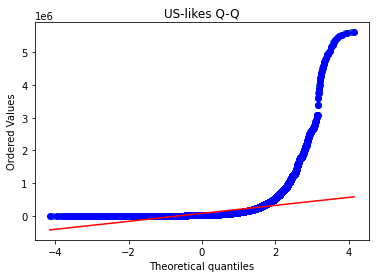

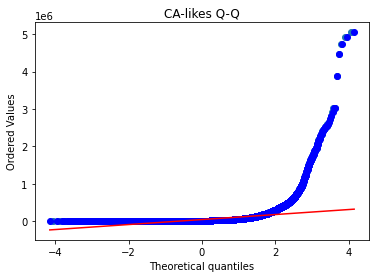

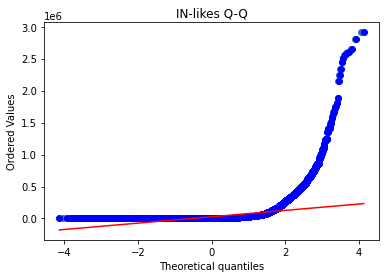

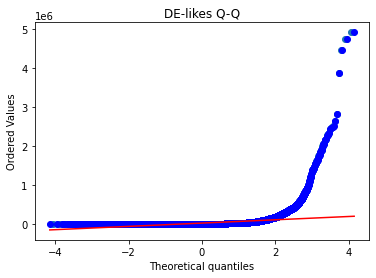

In [52]:
#likes属性Q-Q图
sorted_ = np.sort(USvideo['likes'].dropna().astype(int))
yvals = np.arange(len(sorted_))/float(len(sorted_))
x_label = stats.norm.ppf(yvals)
plt.scatter(x_label, sorted_)
stats.probplot(USvideo['likes'].dropna().astype(int), dist="norm", plot=plt)
plt.title('US-likes Q-Q')
plt.savefig('./videoResult/US/USlikes_qq.png')
plt.show()

sorted_ = np.sort(CAvideo['likes'].dropna().astype(int))
yvals = np.arange(len(sorted_))/float(len(sorted_))
x_label = stats.norm.ppf(yvals)
plt.scatter(x_label, sorted_)
stats.probplot(CAvideo['likes'].dropna().astype(int), dist="norm", plot=plt)
plt.title('CA-likes Q-Q')
plt.savefig('./videoResult/CA/CAlikes_qq.png')
plt.show()

sorted_ = np.sort(INvideo['likes'].dropna().astype(int))
yvals = np.arange(len(sorted_))/float(len(sorted_))
x_label = stats.norm.ppf(yvals)
plt.scatter(x_label, sorted_)
stats.probplot(INvideo['likes'].dropna().astype(int), dist="norm", plot=plt)
plt.title('IN-likes Q-Q')
plt.savefig('./videoResult/IN/INlikes_qq.png')
plt.show()

sorted_ = np.sort(DEvideo['likes'].dropna().astype(int))
yvals = np.arange(len(sorted_))/float(len(sorted_))
x_label = stats.norm.ppf(yvals)
plt.scatter(x_label, sorted_)
stats.probplot(DEvideo['likes'].dropna().astype(int), dist="norm", plot=plt)
plt.title('DE-likes Q-Q')
plt.savefig('./videoResult/DE/DElikes_qq.png')
plt.show()

### 2.2 数据缺失的处理
#### 2.2.1 将缺失部分剔除

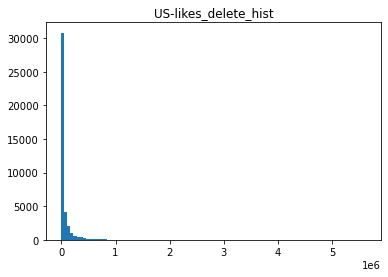

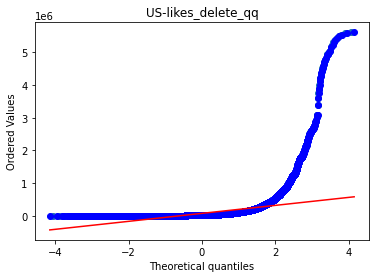

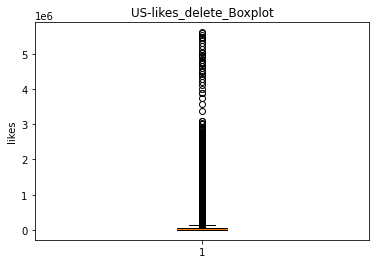

In [64]:
#将缺失值剔除
#直方图
plt.hist(USvideo['likes'].dropna(),bins=100)
plt.title('US-likes_delete_hist')
plt.savefig('./videoResult/us-likes_delete_hist.png')
plt.show()

#QQ图
sorted_ = np.sort(USvideo['likes'].dropna())
yvals = np.arange(len(sorted_))/float(len(sorted_))
x_label = stats.norm.ppf(yvals)
plt.scatter(x_label, sorted_)
stats.probplot(USvideo['likes'], dist="norm", plot=plt)
plt.title('US-likes_delete_qq')
plt.savefig('./videoResult/us-likes_delete_qq.png')
plt.show()

#盒图
plt.boxplot(USvideo['likes'].dropna())
plt.ylabel('likes')
plt.title('US-likes_delete_Boxplot')
plt.savefig('./videoResult/us-likes_delete_box.png')
plt.show()

#### 2.2.2 最高频率值填补缺失值

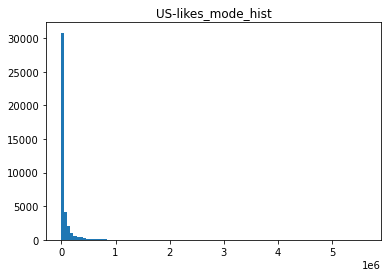

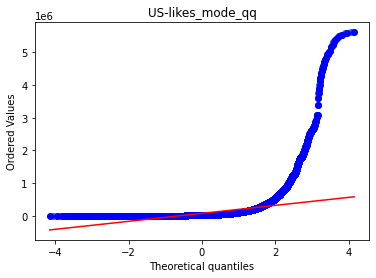

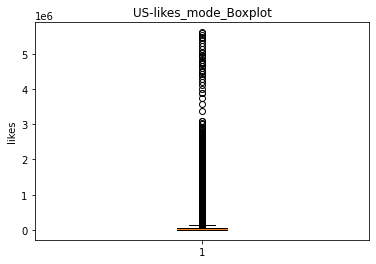

In [65]:
#最高频率
#直方图
plt.hist(USvideo['likes'].fillna(USvideo['likes'].interpolate(missing_values='NaN', strategy='mode', axis=0, verbose=0, copy=True)),bins=100)
plt.title('US-likes_mode_hist')
plt.savefig('./videoResult/likes_mode_hist.png')
plt.show()

#QQ图
sorted_ = np.sort(USvideo['likes'].fillna(USvideo['likes'].interpolate(missing_values='NaN', strategy='mode', axis=0, verbose=0, copy=True)))
yvals = np.arange(len(sorted_))/float(len(sorted_))
x_label = stats.norm.ppf(yvals)
plt.scatter(x_label, sorted_)
stats.probplot(USvideo['likes'], dist="norm", plot=plt)
plt.title('US-likes_mode_qq')
plt.savefig('./videoResult/likes_mode_qq.png')
plt.show()

#盒图
plt.boxplot(USvideo['likes'].fillna(USvideo['likes'].interpolate(missing_values='NaN', strategy='mode', axis=0, verbose=0, copy=True)))
plt.ylabel('likes')
plt.title('US-likes_mode_Boxplot')
plt.savefig('./videoResult/likes_mode_box.png')
plt.show()


### 2.2.3 通过属性相关关系来填补缺失值

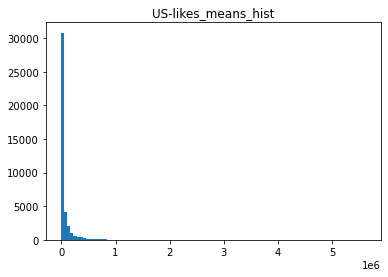

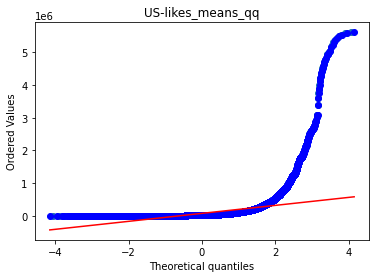

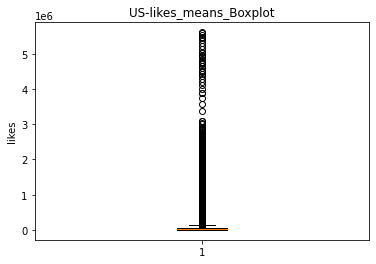

In [66]:
#通过属性的相关关系来填补缺失值
#直方图
plt.hist(USvideo['likes'].interpolate(missing_values='NaN', strategy='mean', axis=0, verbose=0, copy=True), bins=100)
plt.title('US-likes_means_hist')
plt.savefig('./videoResult/likes_means_hist.png')
plt.show()

#QQ图
sorted_ = np.sort(USvideo['likes'].interpolate(missing_values='NaN', strategy='mean', axis=0, verbose=0, copy=True))
yvals = np.arange(len(sorted_))/float(len(sorted_))
x_label = stats.norm.ppf(yvals)
plt.scatter(x_label, sorted_)
stats.probplot(USvideo['likes'].interpolate(missing_values='NaN', strategy='mean', axis=0, verbose=0, copy=True), dist="norm", plot=plt)
plt.title('US-likes_means_qq')
plt.savefig('./videoResult/likes_means_qq.png')
plt.show()

#盒图
plt.boxplot(USvideo['likes'].interpolate(missing_values='NaN', strategy='mean', axis=0, verbose=0, copy=True))
plt.ylabel('likes')
plt.title('US-likes_means_Boxplot')
plt.savefig('./videoResult/likes_means_box.png')
plt.show()

### 2.2.4 通过数据对象之间的相似性来填补缺失值

In [67]:
#通过数据对象之间的相似性来填补缺失值
#USvideo_data = USvideo[USvideo['views'].notnull()]
known_price = USvideo[USvideo['likes'].notnull()].sample(frac=0.1)
unknown_price = USvideo[USvideo['likes'].isnull()]
x = known_price[['views']]
y = known_price[['likes']]
t_x = unknown_price[['views']]
fc = RandomForestClassifier()
fc.fit(x, y.values.ravel())
pr = fc.predict(t_x)
USvideo.loc[USvideo.likes.isnull(), 'likes'] = pr

#直方图
plt.hist(USvideo['likes'].astype(int), bins=100)
plt.title('US-likes_relative_hist')
plt.savefig('./videoResult/likes_relative_hist.png')
plt.show()

#QQ图
sorted_ = np.sort(USvideo['likes'])
yvals = np.arange(len(sorted_))/float(len(sorted_))
x_label = stats.norm.ppf(yvals)
plt.scatter(x_label, sorted_)
stats.probplot(USvideo['likes'])
plt.title('US-likes_relative_qq')
plt.savefig('./videoResult/likes_relative_qq.png')
plt.show()

#盒图
plt.boxplot(USvideo['likes'])
plt.ylabel('likes')
plt.title('US-likes_relative_Boxplot')
plt.savefig('./videoResult/likes_relative_box.png')
plt.show()


ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.